# Laboratorio 4 - An√°lisis Geoespacial
**Repositorio:** https://github.com/DiegoLinares11/Lab-4-Analisis-Geoespacial

- Diego Linares
- Jos√© Prince

## Conexi√≥n y AOIs

In [40]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.enums import Resampling
import openeo
from datetime import date

# 1) Conexi√≥n (punto 1 del PDF)
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


 2) AOIs del PDF

In [41]:
lago_atitlan = {"west": -91.326256, "east": -91.07151, "south": 14.5948,  "north": 14.750979}
lago_amatitlan = {"west": -90.638065, "east": -90.512924, "south": 14.412347, "north": 14.493799}

 3) Fechas (>= 6 meses, usar baja nubosidad)


In [42]:
good_dates = [
"2025-02-07","2025-02-10","2025-02-25","2025-02-27","2025-03-02","2025-03-04","2025-03-07","2025-03-09",
"2025-03-12","2025-03-14","2025-03-19","2025-03-22","2025-03-24","2025-03-26","2025-04-03","2025-04-11",
"2025-04-13","2025-04-15","2025-04-16","2025-04-18","2025-04-28","2025-05-03","2025-05-13","2025-05-28",
"2025-07-10","2025-07-17","2025-07-20","2025-07-24","2025-08-01"
]

In [43]:

BANDS = ["B02","B03","B04","B05","B08"]  # + B05 para NDCI

def download_s2(lake_name, bbox, d, offline=False):
    out = f"data/{lake_name}_{d}.tif"
    if os.path.exists(out) or offline:
        return out if os.path.exists(out) else None
    cube = connection.load_collection(
        "SENTINEL2_L2A",
        spatial_extent=bbox,
        temporal_extent=[d, d],
        bands=BANDS
    )
    res = cube.save_result(format="GTIFF")
    job = connection.create_job(res)
    job.start_and_wait()
    os.makedirs("data", exist_ok=True)
    job.download_results(out)
    return out

def normalize(b, nodata):
    b = b.astype(np.float32)
    mask = np.ones_like(b, bool) if nodata is None else (b != nodata)
    if not np.any(mask): return np.zeros_like(b, np.float32)
    lo, hi = np.percentile(b[mask], (2, 98))
    return np.clip((b - lo) / (hi - lo + 1e-6), 0, 1)

def read_bands(path):
    with rasterio.open(path) as src:
        arr = src.read()     # 0:B02 1:B03 2:B04 3:B05 4:B08
        nod = src.nodata
    return arr, nod

def compute_indices(arr):
    B02, B03, B04, B05, B08 = arr
    # escala a reflectancia si viene en entero
    if B04.dtype != np.float32 and B04.max() > 1.5:
        B02 = B02.astype(np.float32)/10000; B03 = B03.astype(np.float32)/10000
        B04 = B04.astype(np.float32)/10000; B05 = B05.astype(np.float32)/10000; B08 = B08.astype(np.float32)/10000
    # √≠ndices (punto 5‚Üínumpy y 8‚Üícorrelaci√≥n NDVI/NDWI) :contentReference[oaicite:7]{index=7}
    ndvi = np.where((B08+B04)==0, np.nan, (B08-B04)/(B08+B04))
    ndwi = np.where((B03+B08)==0, np.nan, (B03-B08)/(B03+B08))
    ndci = np.where((B05+B04)==0, np.nan, (B05-B04)/(B05+B04))  # √≠ndice de cianobacteria
    return ndvi, ndwi, ndci

def show_true_color(arr, nodata, title):
    B02, B03, B04, *_ = arr
    rgb = np.dstack([normalize(B04, nodata), normalize(B03, nodata), normalize(B02, nodata)])
    plt.figure(figsize=(7,5)); plt.imshow(rgb); plt.title(title); plt.axis('off'); plt.show()

=== 4) DESCARGA y 5) Numpy ===

C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:40: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.where((B08+B04)==0, np.nan, (B08-B04)/(B08+B04))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:40: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((B08+B04)==0, np.nan, (B08-B04)/(B08+B04))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:41: RuntimeWarning: divide by zero encountered in divide
  ndwi = np.where((B03+B08)==0, np.nan, (B03-B08)/(B03+B08))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:41: RuntimeWarning: invalid value encountered in divide
  ndwi = np.where((B03+B08)==0, np.nan, (B03-B08)/(B03+B08))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:42: RuntimeWarning: divide by zero encountered in divide
  ndci = np.where((B05+B04)==0, np.nan, (B05-B04)/(B05+B04))  # √≠ndice de cianobacteria
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:

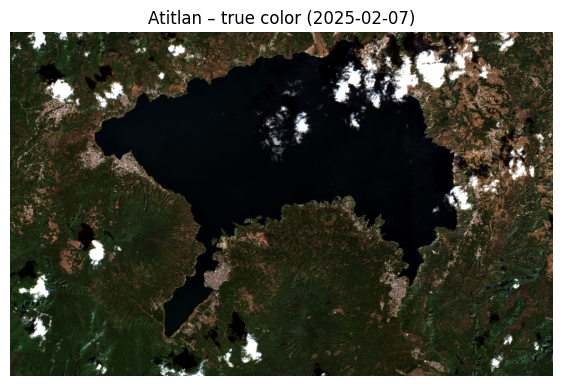

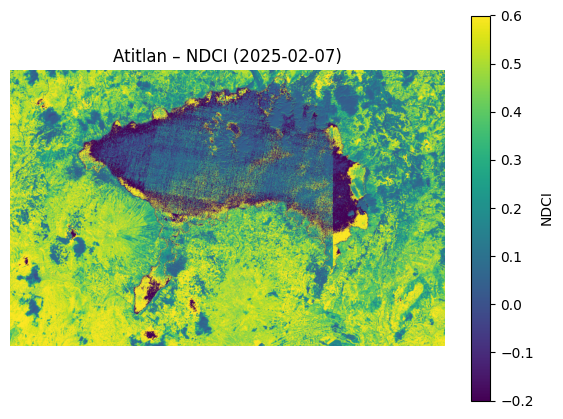

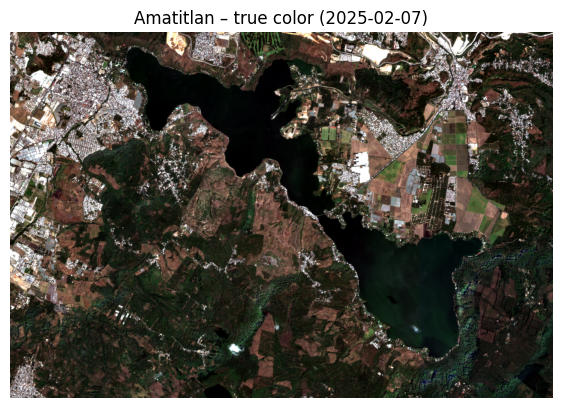

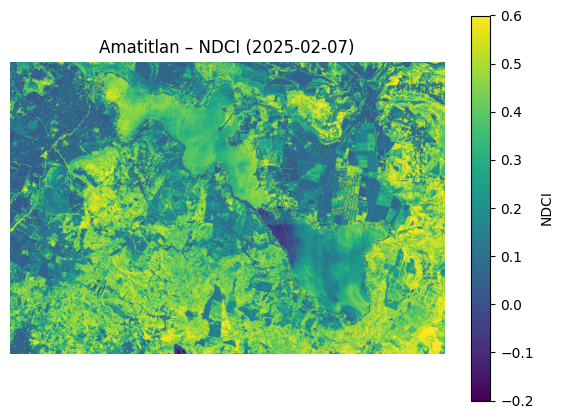

Saltando amatitlan 2025-02-10 invalid path or file: None
Saltando amatitlan 2025-02-25 invalid path or file: None
Saltando amatitlan 2025-03-02 invalid path or file: None
Saltando amatitlan 2025-03-07 invalid path or file: None
Saltando amatitlan 2025-03-12 invalid path or file: None
Saltando amatitlan 2025-03-22 invalid path or file: None
Saltando amatitlan 2025-04-11 invalid path or file: None
Saltando amatitlan 2025-04-16 invalid path or file: None
Saltando amatitlan 2025-07-10 invalid path or file: None
Saltando amatitlan 2025-07-20 invalid path or file: None


In [44]:
def process_lake(lake_name, bbox):
    rows = []
    for d in good_dates:
        try:
            tif = download_s2(lake_name, bbox, d, offline=True)  # puntos 1‚Äì2‚Äì3‚Äì4‚Äì5 del PDF
            arr, nod = read_bands(tif)
            ndvi, ndwi, ndci = compute_indices(arr)
            # guarda m√©tricas promedio (punto 6.1)
            rows.append({"date": d,
                         "ndvi_mean": np.nanmean(ndvi),
                         "ndwi_mean": np.nanmean(ndwi),
                         "ndci_mean": np.nanmean(ndci)})
            # primer render por lago (true color)
            if d == good_dates[0]:
                show_true_color(arr, nod, f"{lake_name.capitalize()} ‚Äì true color ({d})")
                plt.figure(figsize=(7,5)); plt.imshow(ndci, cmap="viridis", vmin=-0.2, vmax=0.6)
                plt.colorbar(label="NDCI"); plt.title(f"{lake_name.capitalize()} ‚Äì NDCI ({d})")
                plt.axis('off'); plt.show()
        except Exception as e:
            print("Saltando", lake_name, d, e)
    return pd.DataFrame(rows).sort_values("date")

ts_atitlan   = process_lake("atitlan",   lago_atitlan)
ts_amatitlan = process_lake("amatitlan", lago_amatitlan)

In [45]:
from datetime import datetime, timedelta
import glob, re

def existing_dates(lake_name):
    files = glob.glob(f"data/{lake_name}_*.tif")
    got = set()
    for f in files:
        m = re.search(rf"{lake_name}_(\d{{4}}-\d{{2}}-\d{{2}})\.tif$", f)
        if m: got.add(m.group(1))
    return got

missing_atitlan   = [d for d in good_dates if d not in existing_dates("atitlan")]
missing_amatitlan = [d for d in good_dates if d not in existing_dates("amatitlan")]

print("Faltan Atitl√°n:", missing_atitlan)
print("Faltan Amatitl√°n:", missing_amatitlan)


Faltan Atitl√°n: []
Faltan Amatitl√°n: ['2025-02-10', '2025-02-25', '2025-03-02', '2025-03-07', '2025-03-12', '2025-03-22', '2025-04-11', '2025-04-16', '2025-07-10', '2025-07-20']


#### Intentar descargar los faltantes

In [46]:
# def fill_missing(lake_name, bbox, missing_dates):
#     ok, bad = [], []
#     for d in missing_dates:
#         p = download_s2(lake_name, bbox, d)  
#         if p: ok.append(d)
#         else: bad.append(d)
#     print(f"{lake_name}: recuperadas {len(ok)}, no logradas {len(bad)} ->", bad)
#     return ok, bad
#
# fill_missing("amatitlan", lago_amatitlan, missing_amatitlan)


Se intento ejecutar este codigo el cual dio error, entonces verificamos los datos y nos fuimos a verificarlos manualmente en copernicus y efectivamente para esos dias que no se descargaron es porque no existen datos para esos dias asi que trabajaremos con los que logramos descargar. 

## An√°lisis temporal

A continuaci√≥n se va a relizar diferentes analisis con los datos previamente obtenidos para obtener un an√°lisis preliminar sobre los datos. Primeramente se va a hacer un ana√°lisis sobre el **inidice promedio de cianobacteria por lago y por fecha**.

In [47]:
# Unir y guardar series de cada lago
ts_atitlan["lake"] = "atitlan"
ts_amatitlan["lake"] = "amatitlan"
ts = pd.concat([ts_atitlan, ts_amatitlan], ignore_index=True).sort_values(["lake","date"])
os.makedirs("out", exist_ok=True)
ts.to_csv("out/indices_timeseries.csv", index=False)
display(ts.head())
display(ts.tail())


date  ndvi_mean  ndwi_mean  ndci_mean       lake
29  2025-02-07   0.454213  -0.424480   0.292999  amatitlan
30  2025-02-27   0.362638  -0.314651   0.193221  amatitlan
31  2025-03-04   0.412859  -0.374418   0.257697  amatitlan
32  2025-03-09   0.247370  -0.216523   0.128231  amatitlan
33  2025-03-14   0.252556  -0.223923   0.141182  amatitlan

date  ndvi_mean  ndwi_mean  ndci_mean     lake
24  2025-07-10   0.205266  -0.173586   0.117497  atitlan
25  2025-07-17   0.390045  -0.331337   0.237919  atitlan
26  2025-07-20   0.243022  -0.214924   0.146986  atitlan
27  2025-07-24   0.439736  -0.290730   0.281450  atitlan
28  2025-08-01   0.594425  -0.469505   0.393129  atitlan

Para los lagos Atitl√°n y Amatitl√°n muestra patrones temporales y diferencias claras en la magnitud de las floraciones. En general, Amatitl√°n tiende a presentar valores de NDCI consistentemente m√°s altos que Atitl√°n en la mayor√≠a de las fechas, lo que sugiere una mayor presencia de clorofila y, por ende, mayor probabilidad de proliferaci√≥n de cianobacterias.

A continuaci√≥n se puede visualizar la evoluci√≥n temporal de cada lago su ndci, ndvi y ndwi promedio, indicando sus picos de floraci√≥n y fechas cr√≠ticas.

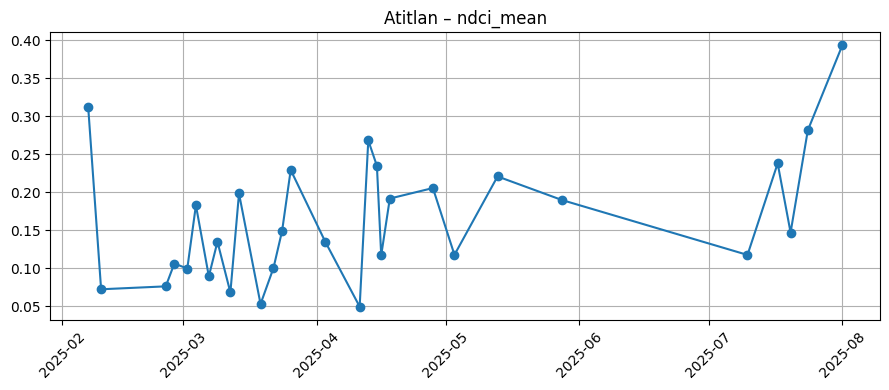

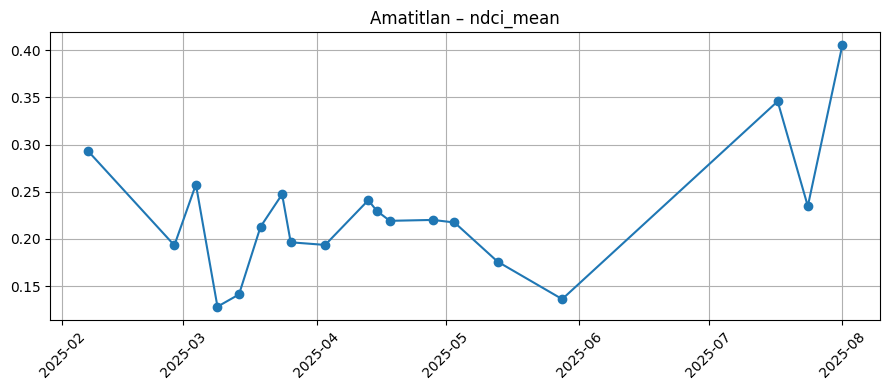

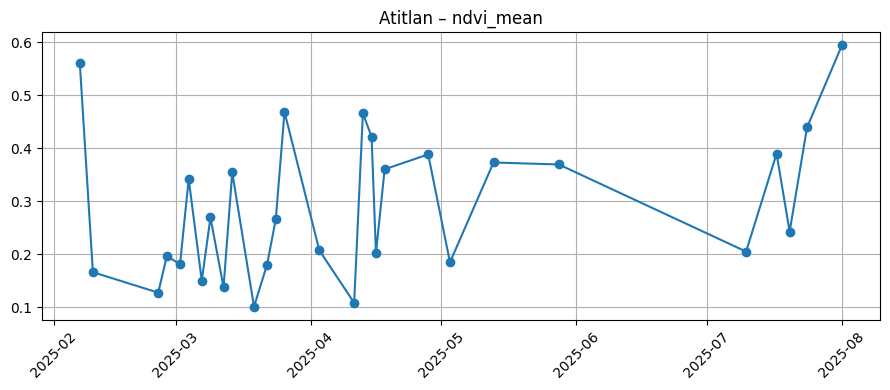

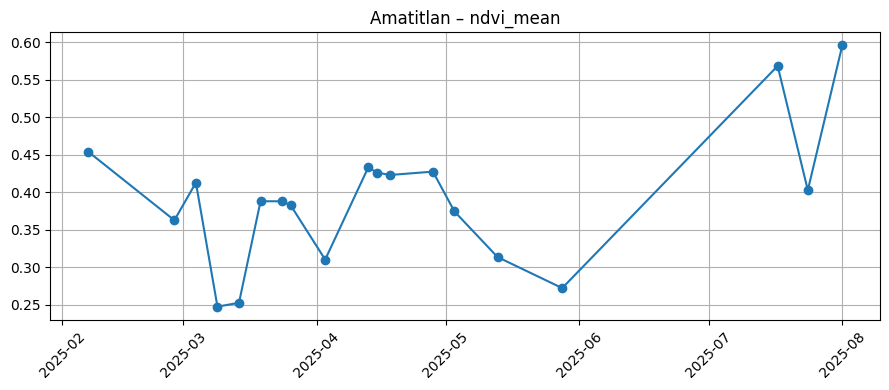

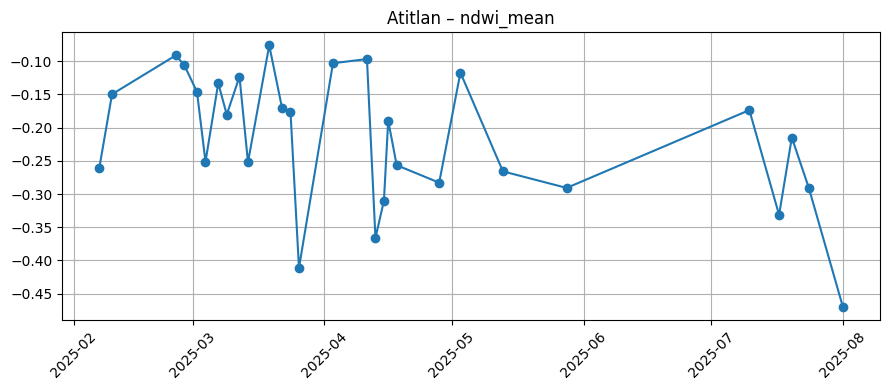

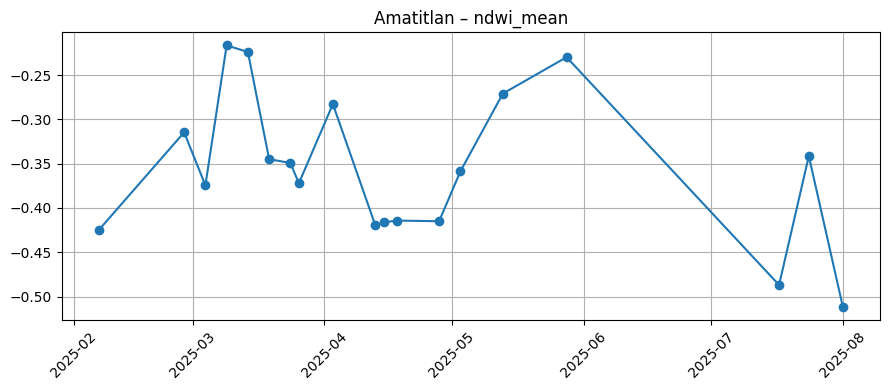

In [48]:
# Graficar series
def plot_series(df, lake, var):
    d = df[df["lake"]==lake].copy()
    x = pd.to_datetime(d["date"])
    plt.figure(figsize=(9,4))
    plt.plot(x, d[var], marker='o')
    plt.title(f"{lake.capitalize()} ‚Äì {var}")
    plt.grid(True); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

for var in ["ndci_mean","ndvi_mean","ndwi_mean"]:
    plot_series(ts, "atitlan", var)
    plot_series(ts, "amatitlan", var)



Amatitl√°n mantiene NDCI m√°s alto en promedio (sugiere mayor Chl-a / condiciones m√°s propensas a floraci√≥n), y ambos lagos muestran picos fuertes a finales de julio‚Äìinicios de agosto.

#### NDVI
Atitl√°n: media 0.292, m√°x 0.594 (sube fuerte hacia fin de julio‚Äìagosto).

Amatitl√°n: media 0.391, m√°x 0.596 (tambi√©n alza marcada en julio‚Äìagosto).

Lectura: en ambos lagos el NDVI sube en la misma √©poca que NDCI (bordes con vegetaci√≥n + posible materia flotante). Eso no prueba floraci√≥n por s√≠ solo, pero acompa√±a el patr√≥n.

#### NDWI
Atitl√°n: media ‚àí0.217 (menos negativo que Amatitl√°n).

Amatitl√°n: media ‚àí0.356 (m√°s negativo).

Lectura: NDWI medio m√°s negativo en Amatitl√°n sugiere mayor fracci√≥n de suelo/urbano/orillas en el AOI (o agua ‚Äúmenos abierta‚Äù de forma agregada). Esto cuadra con que la caja/borde urbano del lago ‚Äúcontamina‚Äù la media si no enmascaras el espejo de agua.

## Mapas de NDCI

Se muestran la distribuci√≥n de cianobacteria dentro de cada lago 

C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:40: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.where((B08+B04)==0, np.nan, (B08-B04)/(B08+B04))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:40: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((B08+B04)==0, np.nan, (B08-B04)/(B08+B04))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:41: RuntimeWarning: divide by zero encountered in divide
  ndwi = np.where((B03+B08)==0, np.nan, (B03-B08)/(B03+B08))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:41: RuntimeWarning: invalid value encountered in divide
  ndwi = np.where((B03+B08)==0, np.nan, (B03-B08)/(B03+B08))
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:42: RuntimeWarning: divide by zero encountered in divide
  ndci = np.where((B05+B04)==0, np.nan, (B05-B04)/(B05+B04))  # √≠ndice de cianobacteria
C:\Users\diego\AppData\Local\Temp\ipykernel_28312\1612047133.py:

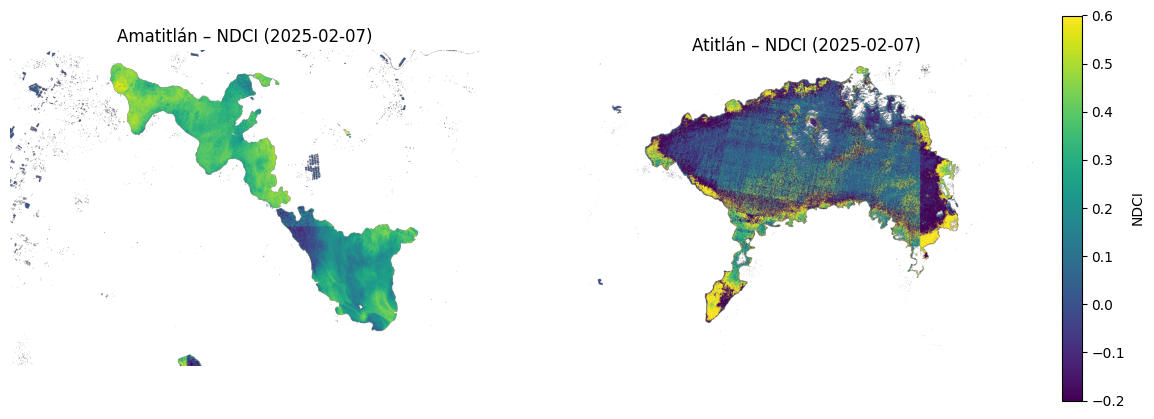

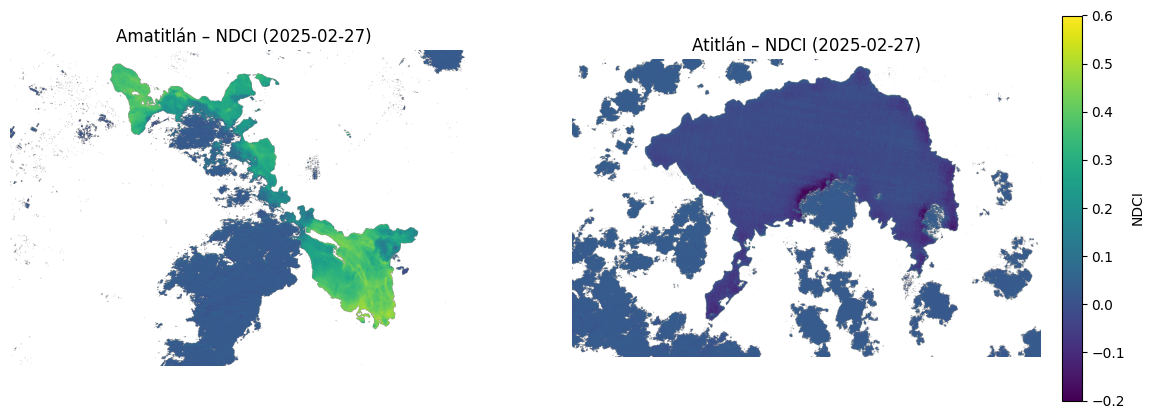

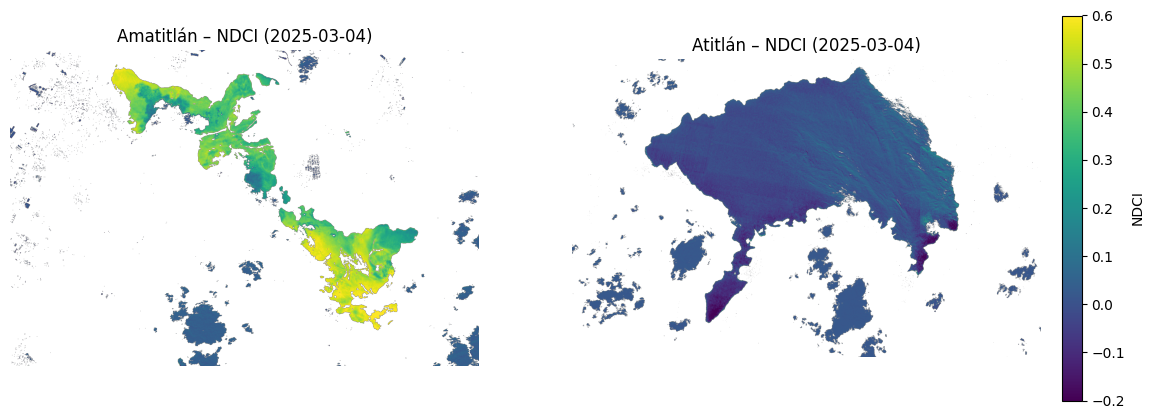

In [49]:
import glob, re

def list_tifs_dict(lake):
    """Devuelve un diccionario {fecha: ruta_tif} para un lago"""
    files = sorted(glob.glob(f"data/{lake}_*.tif"))
    d = {}
    for f in files:
        m = re.search(rf"{lake}_(\d{{4}}-\d{{2}}-\d{{2}})\.tif$", f)
        if m:
            d[m.group(1)] = f
    return d

def compute_ndci(path):
    arr, _ = read_bands(path)
    ndvi, ndwi, ndci = compute_indices(arr)
    ndci = np.where(ndwi > 0, ndci, np.nan)  # opcional: solo agua
    return ndci

def show_ndci_side_by_side(path1, title1, path2, title2):
    ndci1 = compute_ndci(path1)
    ndci2 = compute_ndci(path2)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    im1 = axes[0].imshow(ndci1, cmap="viridis", vmin=-0.2, vmax=0.6)
    axes[0].set_title(title1)
    axes[0].axis('off')

    im2 = axes[1].imshow(ndci2, cmap="viridis", vmin=-0.2, vmax=0.6)
    axes[1].set_title(title2)
    axes[1].axis('off')

    cbar = fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.03, pad=0.02)
    cbar.set_label("NDCI")

    plt.show()

tifs_atitlan = list_tifs_dict("atitlan")
tifs_amatitlan = list_tifs_dict("amatitlan")

fechas_comunes = sorted(set(tifs_atitlan.keys()) & set(tifs_amatitlan.keys()))

for fecha in fechas_comunes[:3]:  # ejemplo con las primeras 3 fechas
    show_ndci_side_by_side(
        tifs_amatitlan[fecha], f"Amatitl√°n ‚Äì NDCI ({fecha})",
        tifs_atitlan[fecha],   f"Atitl√°n ‚Äì NDCI ({fecha})"
    )

### Amatitl√°n

Se puede ver que para el 7 de febrero, el lago de Matitl√°n se muestra una distribuci√≥n de cianobacterias moderada a alta en su superficie, con valores de NDCI entre 0.3 y 0.5. Para dinales del mes de febrero se aprecia una notable disminuci√≥n en la presencia de cianobacterias, con la mayor√≠a del lago mostrando valores cercanos a 0 o negativos, indicando una menor proliferanci√≥n. Para el 4 de marzo, se ve un resurgimiento de la cianobacteria, con una concentraci√≥n alta, similar o incluso superior a la de la primera fecha.

### Atitlan

Para el lago de Atitl√°n se ve que para la primera fecha, el NDCI indicaba la presencia de cianobacterias en varias √°reas. Para finales del mes, la proliferaci√≥n de cianobacterias presenta una disminuci√≥n, mostrando bajos indices de NDCI en diferentes partes del lago. Para principios de marzo, se observa un ligero aumento en la proliferaci√≥n. Este lago presenta una concentraci√≥n de cianobacterias menor a la de Amatitl√°n.

#### Correlaci√≥n NDCI vs NDVI/NDWI

In [50]:
for lake in ["atitlan","amatitlan"]:
    d = ts[ts["lake"]==lake][["ndci_mean","ndvi_mean","ndwi_mean"]]
    print(f"Correlaciones {lake}:\n", d.corr(), "\n")


Correlaciones atitlan:
            ndci_mean  ndvi_mean  ndwi_mean
ndci_mean   1.000000   0.979356  -0.901963
ndvi_mean   0.979356   1.000000  -0.922880
ndwi_mean  -0.901963  -0.922880   1.000000 

Correlaciones amatitlan:
            ndci_mean  ndvi_mean  ndwi_mean
ndci_mean   1.000000   0.958622  -0.894787
ndvi_mean   0.958622   1.000000  -0.970648
ndwi_mean  -0.894787  -0.970648   1.000000 



Corr(NDCI, NDVI): Atitl√°n 0.98, Amatitl√°n 0.96 ‚Üí muy positiva.

Corr(NDCI, NDWI): Atitl√°n ‚àí0.90, Amatitl√°n ‚àí0.89 ‚Üí muy negativa.

Corr(NDVI, NDWI): Atitl√°n ‚àí0.92, Amatitl√°n ‚àí0.97 ‚Üí muy negativa.

las medias se calcularon sobre todo el AOI (incluye tierra), no s√≥lo agua. Con eso, cuando sube vegetaci√≥n (NDVI ‚Üë) en orillas/entorno, el NDWI (agua) baja y el NDCI puede subir (efecto mezcla/adyacencia + vegetaci√≥n flotante).

## An√°lisis y comparaci√≥n de los lagos

### Proliferaci√≥n de cianobacteria (NDCI)

#### Atitl√°n

El NDCI promedio en el lago de Atitl√°n muestra una fluctuaci√≥n a lo largo del per√≠odo, con una tendencia de incremento notable a partir de julio, alcanzando su punto m√°s alto a principios de agosto de 2025. Los datos confirman este patr√≥n, mostrando un NDCI de 0.117 en julio y un pico de 0.393 a principios de agosto. Esto sugiere que las condiciones ambientales de los meses de verano favorecen la proliferaci√≥n de estas bacterias.

NDCI medio = 0.165 (mediana 0.147; œÉ=0.084).

Pico: 0.393 el 2025-08-01 (final de √©poca lluviosa).

Frecuencia (proxy de ‚Äúevento‚Äù):

NDCI > 0.20 en 31% de las fechas.

NDCI > 0.30 en 6.9% de las fechas.

Estacionalidad (media mensual): febrero-marzo bajos (~0.13 ‚Äì 0.14), aumento gradual en abril-mayo (~0.17 ‚Äì 0.18) y salto fuerte en agosto (0.393).

Patr√≥n espacial: parches altos en bah√≠as y orillas; el centro del lago mantiene valores bajos-moderados.

#### Amatitl√°n

El lago de Amatitl√°n presenta una variabilidad considerable. A principios de febrero de 2025, el NDCI promedio es de 0.293, descendiendo a 0.193 a finales del mismo mes, Sin embargo, a principios de marzo, el √≠ndice vuelve a subir a 0.258. AL igual que en Atitl√°n, las series de tiempo indican que el NDCI tiende a aumentar hacia los meses de julio y agosto alcanzando vaores m√°s altos en comparaci√≥n con los meses de invierno.

NDCI medio = 0.226 (mediana 0.219; œÉ=0.068).

Pico: 0.405 el 2025-08-01.

Frecuencia:

NDCI > 0.20 en 63% de las fechas.

NDCI > 0.30 en 10.5% de las fechas.

Estacionalidad: febrero relativamente alto (0.243), valle en mayo (0.177) y alza marcada en julio (0.290)‚Äìagosto (0.405).

Patr√≥n espacial: franjas amplias con NDCI moderado-alto cerca de la ribera; m√°s homog√©neo que Atitl√°n en las fechas pico.

Nota: los promedios por fecha se calcularon sobre el AOI completo; los mapas se muestran ‚Äúsolo agua‚Äù con NDWI>0. Para un an√°lisis m√°s ‚Äúagua pura‚Äù a nivel de serie, puede repetirse el promedio con m√°scara de agua (NDWI/MNDWI) como robustez.



### Intensidad y frecuencia de floraciones

Intensidad promedio: Amatitl√°n > Atitl√°n
(0.226 vs 0.165; adem√°s, el pico de Amatitl√°n es apenas mayor: 0.405 vs 0.393).

Frecuencia (fechas por encima de umbrales):

0.20: 63% Amatitl√°n vs 31% Atitl√°n.

0.30: 10.5% Amatitl√°n vs 6.9% Atitl√°n.
‚áí Amatitl√°n presenta floraciones m√°s frecuentes y sostenidas.

Temporalidad compartida: ambos concentran m√°ximos a fines de julio‚Äìinicios de agosto (√©poca lluviosa), con un alto temprano el 2025-02-07.

Variabilidad: Atitl√°n muestra m√°s variaci√≥n inter-fecha (œÉ=0.084 vs 0.068), coherente con un patr√≥n espacial m√°s parcheado.

### Posibles causas y diferencias

Morfometr√≠a e hidrolog√≠a

Atitl√°n: lago profundo de caldera, mayor volumen y capacidad de diluci√≥n; menos intercambio con zonas urbanas densas ‚Üí tendencia a picos localizados y respuesta m√°s ‚Äúpuntual‚Äù.

Amatitl√°n: m√°s somero y peque√±o, cuenca altamente urbanizada (descargas y escorrent√≠a m√°s intensas) ‚Üí enriquecimiento de nutrientes m√°s r√°pido y parches extensos cerca de la ribera.

Uso del suelo / presi√≥n urbana

Mayor proporci√≥n de borde urbano e infraestructuras alrededor de Amatitl√°n favorece aportes difusos y puntuales (eutrofizaci√≥n).

En Atitl√°n domina un entorno m√°s natural en gran parte de la ribera, con focos cr√≠ticos en entradas de r√≠os y bah√≠as.

Estacionalidad clim√°tica

Lluvias (junio‚Äìagosto) aumentan carga de nutrientes y estratificaci√≥n + temperaturas m√°s altas favorecen crecimiento de fitoplancton ‚Üí explica los picos sincronizados de ambos lagos en julio-agosto

## Predicci√≥n del √≠ndice de cianobacteria

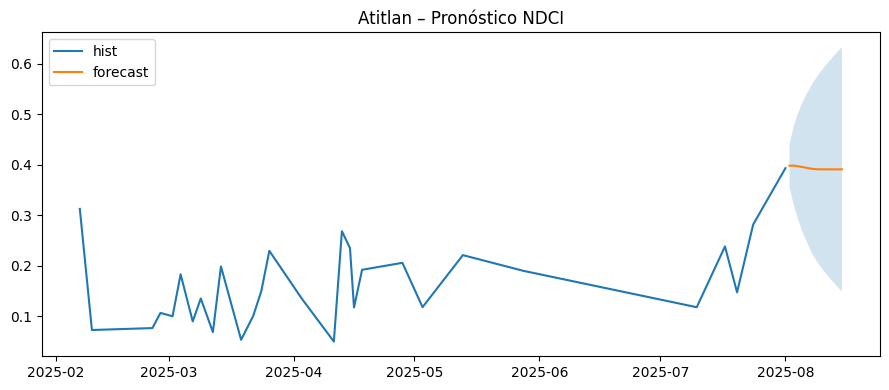

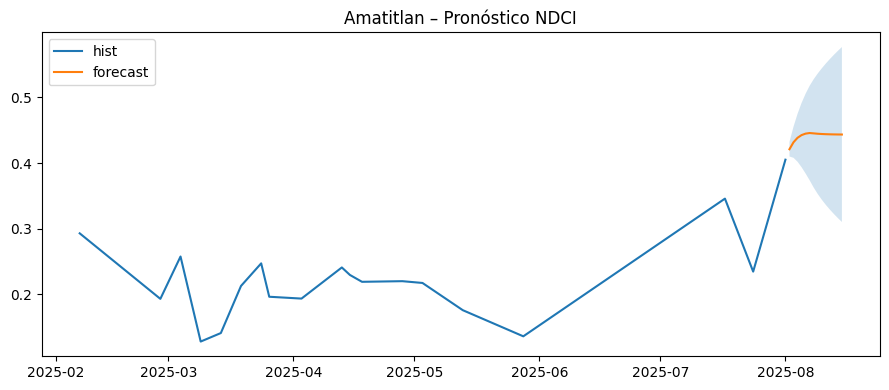

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_ndci(ts_df, lake, steps=14):
    d = ts_df[ts_df["lake"]==lake].copy()
    y = pd.to_numeric(d["ndci_mean"], errors="coerce")
    y.index = pd.to_datetime(d["date"])
    y = y.asfreq("D").interpolate()   # relleno simple diario
    model = SARIMAX(y, order=(1,1,1), seasonal_order=(0,0,1,7))
    res = model.fit(disp=False)
    fc = res.get_forecast(steps=steps)
    ci = fc.conf_int()
    plt.figure(figsize=(9,4))
    plt.plot(y.index, y.values, label="hist")
    plt.plot(fc.predicted_mean.index, fc.predicted_mean.values, label="forecast")
    plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)
    plt.title(f"{lake.capitalize()} ‚Äì Pron√≥stico NDCI"); plt.legend(); plt.tight_layout(); plt.show()
    return res, fc

res_a, fc_a = forecast_ndci(ts, "atitlan")
res_m, fc_m = forecast_ndci(ts, "amatitlan")


## Predicci√≥n de cianobacteria en un punto

In [52]:
from rasterio.transform import xy
import pyproj

def extract_data_from_tif(tif_file, lake_name, sample_frac=0.01):
    with rasterio.open(tif_file) as src:

        b2 = src.read(1).astype(float)
        b3 = src.read(2).astype(float)
        b4 = src.read(3).astype(float)
        b5 = src.read(4).astype(float)
        b8 = src.read(5).astype(float)
    
        ndci = (b5 - b4) / (b5 + b4 + 1e-6)
        mask = ~np.isnan(ndci)
    
        rows, cols = np.where(mask)

        n_pixels = len(rows)
        n_sample = int(n_pixels * sample_frac)
        idx = np.random.choice(np.arange(n_pixels), size=n_sample, replace=False)

        rows, cols = rows[idx], cols[idx]
        xs, ys = rasterio.transform.xy(src.transform, rows, cols)

        transformer = pyproj.Transformer.from_crs(src.crs, "EPSG:4326", always_xy=True)
        lons, lats = transformer.transform(xs, ys)
    
        data = pd.DataFrame({
            "lake": lake_name,
            "lat": lats,
            "lon": lons,
            "B02": b2[rows, cols],
            "B03": b3[rows, cols],
            "B04": b4[rows, cols],
            "B05": b5[rows, cols],
            "B08": b8[rows, cols],
            "NDCI": ndci[rows, cols],
            "label": (ndci[rows, cols] > 0.15).astype(int)
        })
    
        return data

lakes = ["atitlan", "amatitlan"]
all_data = []

for lake in lakes:
    files = sorted(glob.glob(f"data/{lake}_*.tif"))
    for f in files:
        print(f"Procesando {f} ...")
        lake_data = extract_data_from_tif(f, lake)
        all_data.append(lake_data)

dataset = pd.concat(all_data, ignore_index=True)

print(dataset)
print("Total de muestras:", len(dataset))
print(dataset["lake"].value_counts())
print(dataset["NDCI"].describe())

Procesando data\atitlan_2025-02-07.tif ...
Procesando data\atitlan_2025-02-10.tif ...
Procesando data\atitlan_2025-02-25.tif ...
Procesando data\atitlan_2025-02-27.tif ...
Procesando data\atitlan_2025-03-02.tif ...
Procesando data\atitlan_2025-03-04.tif ...
Procesando data\atitlan_2025-03-07.tif ...
Procesando data\atitlan_2025-03-09.tif ...
Procesando data\atitlan_2025-03-12.tif ...
Procesando data\atitlan_2025-03-14.tif ...
Procesando data\atitlan_2025-03-19.tif ...
Procesando data\atitlan_2025-03-22.tif ...
Procesando data\atitlan_2025-03-24.tif ...
Procesando data\atitlan_2025-03-26.tif ...
Procesando data\atitlan_2025-04-03.tif ...
Procesando data\atitlan_2025-04-11.tif ...
Procesando data\atitlan_2025-04-13.tif ...
Procesando data\atitlan_2025-04-15.tif ...
Procesando data\atitlan_2025-04-16.tif ...
Procesando data\atitlan_2025-04-18.tif ...
Procesando data\atitlan_2025-04-28.tif ...
Procesando data\atitlan_2025-05-03.tif ...
Procesando data\atitlan_2025-05-13.tif ...
Procesando 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df_encoded = pd.get_dummies(dataset, columns=["lake"], drop_first=True)

x = df_encoded[["B02", "B03", "B04", "B05", "B08"]]
y = df_encoded["label"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=500, solver="lbfgs")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

Matriz de confusi√≥n:
[[176022  10969]
 [ 12087 128510]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    186991
           1       0.92      0.91      0.92    140597

    accuracy                           0.93    327588
   macro avg       0.93      0.93      0.93    327588
weighted avg       0.93      0.93      0.93    327588



In [54]:
def predict_point(lat, lon, lake_name, dataset, model):
    subset = dataset[dataset["lake"] == lake_name]
    dist = (subset["lat"] - lat)**2 + (subset["lon"] - lon)**2
    nearest = subset.loc[dist.idxmin()]

    sample = pd.DataFrame([[
        nearest["B02"], nearest["B03"], nearest["B04"],
        nearest["B05"], nearest["B08"]
    ]], columns=["B02","B03","B04","B05","B08"])

    proba = model.predict_proba(sample)[0][1]
    return {
        "probabilidad_cianobacteria": proba,
        "presencia": proba >= 0.5,
        "pixel_info": nearest.to_dict()
    }

def print_prediction(resultado):
    print("üìç Predicci√≥n de cianobacteria")
    print("-" * 40)
    print(f"üåä Lago: {resultado['pixel_info']['lake']}")
    print(f"üó∫Ô∏è  Coordenadas: ({resultado['pixel_info']['lat']:.6f}, {resultado['pixel_info']['lon']:.6f})")
    print(f"üß™ Probabilidad de cianobacteria: {resultado['probabilidad_cianobacteria']:.2%}")
    print(f"‚ö†Ô∏è  Presencia detectada: {'‚úÖ S√≠' if resultado['presencia'] else '‚ùå No'}")
    print("-" * 40)
    print("üìä Valores del p√≠xel m√°s cercano:")
    for band in ["B02", "B03", "B04", "B05", "B08", "NDCI"]:
        print(f"   {band}: {resultado['pixel_info'][band]}")


### Atitl√°n

In [55]:
import folium

lat, lon = 14.6928, -91.2030  

m = folium.Map(location=[lat, lon], zoom_start=12)

# Al hacer clic muestra lat/lon y coloca un popup
folium.LatLngPopup().add_to(m)

m.save("lago_atitlan_click.html")
m

In [56]:
resultado = predict_point(
    lon=-91.255637,
    lat=14.643010,
    lake_name="atitlan",
    dataset=dataset,
    model=model
)

print_prediction(resultado)

üìç Predicci√≥n de cianobacteria
----------------------------------------
üåä Lago: atitlan
üó∫Ô∏è  Coordenadas: (14.643100, -91.255637)
üß™ Probabilidad de cianobacteria: 98.90%
‚ö†Ô∏è  Presencia detectada: ‚úÖ S√≠
----------------------------------------
üìä Valores del p√≠xel m√°s cercano:
   B02: 345.0
   B03: 522.0
   B04: 335.0
   B05: 891.0
   B08: 3104.0
   NDCI: 0.45350734057625824


### Amatitl√°n

In [57]:
import folium

lat, lon = 14.4654, -90.5786  

m = folium.Map(location=[lat, lon], zoom_start=12)

# Al hacer clic muestra lat/lon y coloca un popup
folium.LatLngPopup().add_to(m)

m.save("lago_atitlan_click.html")
m

In [58]:
#14.435505 -90.589747
resultado = predict_point(
    lon=-90.589747,
    lat=14.435505,
    lake_name="amatitlan",
    dataset=dataset,
    model=model
)

print_prediction(resultado)

üìç Predicci√≥n de cianobacteria
----------------------------------------
üåä Lago: amatitlan
üó∫Ô∏è  Coordenadas: (14.435595, -90.589654)
üß™ Probabilidad de cianobacteria: 94.97%
‚ö†Ô∏è  Presencia detectada: ‚úÖ S√≠
----------------------------------------
üìä Valores del p√≠xel m√°s cercano:
   B02: 1076.0
   B03: 1300.0
   B04: 1206.0
   B05: 1640.0
   B08: 3348.0
   NDCI: 0.15249472939125275


## Modelo H√≠brido

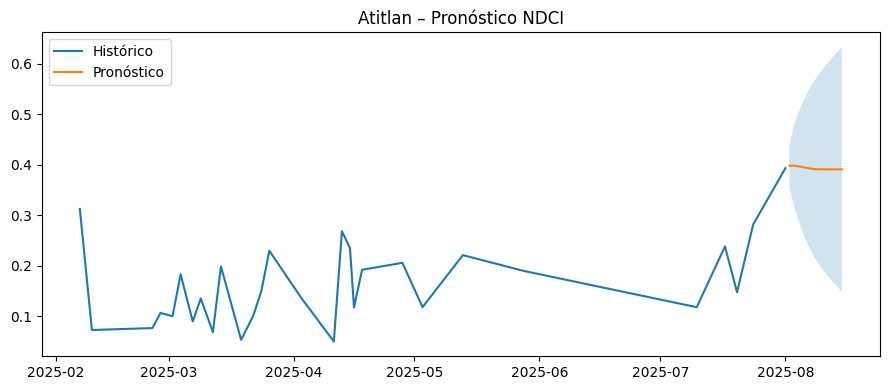

Matriz de confusi√≥n:
[[186898     93]
 [   184 140413]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186991
           1       1.00      1.00      1.00    140597

    accuracy                           1.00    327588
   macro avg       1.00      1.00      1.00    327588
weighted avg       1.00      1.00      1.00    327588

üìç Predicci√≥n de cianobacteria
----------------------------------------
üåä Lago: atitlan
üó∫Ô∏è  Coordenadas: (14.643100, -91.255637)
üß™ Probabilidad de cianobacteria: 100.00%
‚ö†Ô∏è  Presencia detectada: ‚úÖ S√≠
----------------------------------------
üìä Valores del p√≠xel m√°s cercano:
   B02: 345.0
   B03: 522.0
   B04: 335.0
   B05: 891.0
   B08: 3104.0
   NDCI: 0.3978086398726446


In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def forecast_ndci(ts_df, lake, steps=14):
    d = ts_df[ts_df["lake"]==lake].copy()
    y = pd.to_numeric(d["ndci_mean"], errors="coerce")
    y.index = pd.to_datetime(d["date"])
    y = y.asfreq("D").interpolate()   # frecuencia diaria
    
    model = SARIMAX(y, order=(1,1,1), seasonal_order=(0,0,1,7))
    res = model.fit(disp=False)
    fc = res.get_forecast(steps=steps)
    
    # Graficar
    ci = fc.conf_int()
    plt.figure(figsize=(9,4))
    plt.plot(y.index, y.values, label="Hist√≥rico")
    plt.plot(fc.predicted_mean.index, fc.predicted_mean.values, label="Pron√≥stico")
    plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)
    plt.title(f"{lake.capitalize()} ‚Äì Pron√≥stico NDCI")
    plt.legend(); plt.tight_layout(); plt.show()
    
    return fc.predicted_mean

def train_classifier(dataset):
    df_encoded = pd.get_dummies(dataset, columns=["lake"], drop_first=True)
    X = df_encoded[["B02", "B03", "B04", "B05", "B08", "NDCI"]]  # incluye NDCI
    y = df_encoded["label"]

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(max_iter=500, solver="lbfgs")
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print("Matriz de confusi√≥n:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificaci√≥n:")
    print(classification_report(y_test, y_pred))
    
    return model

def predict_hybrid(lat, lon, lake_name, dataset, model, ndci_forecast):
    # buscar p√≠xel m√°s cercano
    subset = dataset[dataset["lake"] == lake_name]
    dist = (subset["lat"] - lat)**2 + (subset["lon"] - lon)**2
    nearest = subset.loc[dist.idxmin()].copy()

    # sustituimos el NDCI observado por el NDCI pronosticado (si existe forecast)
    if ndci_forecast is not None:
        nearest["NDCI"] = ndci_forecast.iloc[0]  # por ejemplo, el primer d√≠a del forecast

    # preparar muestra
    sample = pd.DataFrame([[
        nearest["B02"], nearest["B03"], nearest["B04"],
        nearest["B05"], nearest["B08"], nearest["NDCI"]
    ]], columns=["B02","B03","B04","B05","B08","NDCI"])

    proba = model.predict_proba(sample)[0][1]
    return {
        "probabilidad_cianobacteria": proba,
        "presencia": proba >= 0.5,
        "pixel_info": nearest.to_dict()
    }

# Pron√≥stico NDCI para Atitl√°n
ndci_fc = forecast_ndci(ts, "atitlan", steps=14)

# Entrenar clasificador
model = train_classifier(dataset)

# Predicci√≥n h√≠brida en un punto del lago Atitl√°n
resultado = predict_hybrid(
    lat=14.643010,
    lon=-91.255637,
    lake_name="atitlan",
    dataset=dataset,
    model=model,
    ndci_forecast=ndci_fc
)

print_prediction(resultado)


El gr√°fico muestra el NDCI hist√≥rico (azul) y el pron√≥stico para el lago de Atitl√°n. Lan banda zul muestra bastante variabilidad, mientras que la banda naranja proyecta un NDCI aproximadamente del 0.39-0..40 en los pr√≥ximos d√≠as. La zona sombreada representa el intervalo de confianza del pron√≥stico. Esto indica que el modelo de series temporales predice que la presencia de cianobacteria se mantiene relativamente alta pero con cierta incertidumbre.

Se puede ver que el modelo de regresi√≥n log√≠stica es extremadamente preciso para los datos actuales, esto indica que existe un sobreajustes en el modelo.

El modelo h√≠brido combina el pron√≥stico de NDCI con las bandas espectrales y es capaz de indicar presencia de cianobacteria en un punto espec√≠fico del algo.

In [ ]:
from folium.plugins import HeatMap
import folium, numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

def _infer_feature_cols(df, model):
    cands = [
        ["B02","B03","B04","B05","B08","NDCI"],  # si el modelo usa NDCI
        ["B02","B03","B04","B05","B08"],         # si el modelo usa solo bandas
    ]
    for cols in cands:
        if all(c in df.columns for c in cols) and getattr(model, "n_features_in_", len(cols)) == len(cols):
            return cols
    return [c for c in cands[0] if c in df.columns]

def plot_predictions_on_map_fast(dataset, model, ndci_forecast, lake_name,
                                 sample=4000, zoom=12, mode="heat",
                                 bbox=None, ndwi_thr=0.05, radius=9, blur=12):
    lake = dataset[dataset["lake"] == lake_name].copy()
    if len(lake) == 0:
        raise ValueError(f"No hay datos para {lake_name}.")

    # Inyecta pron√≥stico si tu modelo usa NDCI como feature
    if ndci_forecast is not None and "NDCI" in lake.columns:
        lake["NDCI"] = float(ndci_forecast.iloc[0])

    # --- SUBMUESTREA PRIMERO (para que sea r√°pido)
    if len(lake) > sample:
        lake = lake.sample(sample, random_state=42)

    # --- FILTRO DE AGUA con NDWI (c√°lculo con tus B03/B08 a la escala que est√©n)
    den = (lake["B03"] + lake["B08"]).astype(float)
    ndwi = (lake["B03"] - lake["B08"]) / (den.replace(0, np.nan))
    lake = lake[ndwi > ndwi_thr]

    # --- CLIP por bbox (tu AOI)
    if bbox is not None:
        lake = lake[(lake["lon"] >= bbox["west"]) & (lake["lon"] <= bbox["east"]) &
                    (lake["lat"] >= bbox["south"]) & (lake["lat"] <= bbox["north"])]

    # Si queda muy poco despu√©s del filtro, relaja ndwi_thr o sube sample
    if len(lake) == 0:
        raise ValueError("Sin puntos tras el filtro NDWI/bbox. Baja ndwi_thr o aumenta sample.")

    # --- Predicci√≥n solo sobre la muestra filtrada
    feat_cols = _infer_feature_cols(lake, model)
    X = lake[feat_cols]
    lake["proba"] = model.predict_proba(X)[:, 1]

    # --- Mapa
    m = folium.Map(location=[lake["lat"].mean(), lake["lon"].mean()], zoom_start=zoom)

    # Dibuja rect√°ngulo del AOI (visual)
    if bbox is not None:
        folium.Rectangle(bounds=[(bbox["south"], bbox["west"]), (bbox["north"], bbox["east"])],
                         color="#222", weight=1, fill=False).add_to(m)

    if mode == "heat":
        HeatMap(lake[["lat","lon","proba"]].values.tolist(),
                radius=radius, blur=blur, max_zoom=12).add_to(m)
    else:
        colors = [to_hex(plt.cm.Reds(p)) for p in lake["proba"].values]
        for (lat, lon, col) in zip(lake["lat"], lake["lon"], colors):
            folium.CircleMarker(location=[lat, lon], radius=3,
                                color=None, fill=True, fill_color=col, fill_opacity=0.7).add_to(m)
    return m


In [ ]:
mapa = plot_predictions_on_map_fast(
    dataset, model, ndci_fc, "atitlan",
    sample=4000, mode="heat",
    bbox=lago_atitlan,    # usa tu dict del AOI
    ndwi_thr=0.05,        # sube/baja este umbral si filtra demasiado o muy poco
    radius=9, blur=12     # menos ‚Äúderrame‚Äù que el default
)
mapa 


In [ ]:
mapa = plot_predictions_on_map_fast(
    dataset, model, ndci_fc, "amatitlan",
    sample=4000, mode="heat",
    bbox=lago_amatitlan,    # usa tu dict del AOI
    ndwi_thr=0.05,        # sube/baja este umbral si filtra demasiado o muy poco
    radius=9, blur=12     # menos ‚Äúderrame‚Äù que el default
)
mapa  
